In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/Shareddrives/Project2- Fraudulent Jobs/Data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv(drive_dir + 'fake_job_postings.csv')

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
for col in df.columns:
    print(f'{col}: {df[col].isna().sum()}')

job_id: 0
title: 0
location: 346
department: 11547
salary_range: 15012
company_profile: 3308
description: 1
requirements: 2695
benefits: 7210
telecommuting: 0
has_company_logo: 0
has_questions: 0
employment_type: 3471
required_experience: 7050
required_education: 8105
industry: 4903
function: 6455
fraudulent: 0


In [5]:
for col in df.columns:
  num_missing = df[col].isna().sum()
  pct_missing = num_missing / df.shape[0]
  print(f'{col}: {num_missing} ({100 * pct_missing}%)')

job_id: 0 (0.0%)
title: 0 (0.0%)
location: 346 (1.9351230425055927%)
department: 11547 (64.58053691275167%)
salary_range: 15012 (83.95973154362416%)
company_profile: 3308 (18.501118568232663%)
description: 1 (0.005592841163310962%)
requirements: 2695 (15.072706935123042%)
benefits: 7210 (40.324384787472034%)
telecommuting: 0 (0.0%)
has_company_logo: 0 (0.0%)
has_questions: 0 (0.0%)
employment_type: 3471 (19.41275167785235%)
required_experience: 7050 (39.42953020134228%)
required_education: 8105 (45.32997762863535%)
industry: 4903 (27.421700223713646%)
function: 6455 (36.10178970917226%)
fraudulent: 0 (0.0%)


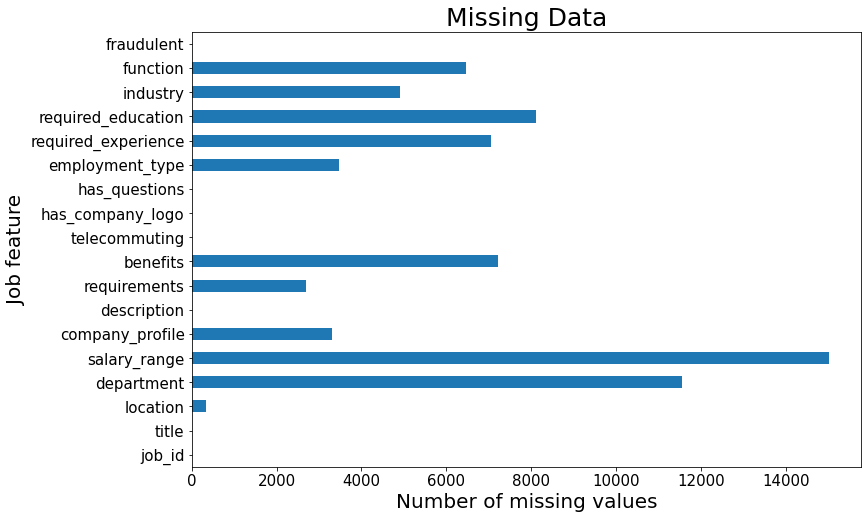

In [6]:
df.isnull().sum().plot.barh(figsize=(12,8))
plt.xlabel('Number of missing values', fontsize = 20)
plt.ylabel('Job feature', fontsize = 20)
plt.title('Missing Data', fontsize = 25)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)

In [7]:
df['fraudulent'].sum()

866

In [8]:
df['isnona'] = df.replace('nan',np.nan).notna().all(1).astype(int)

In [9]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,isnona
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0


In [10]:
df['department_na'] = df['department'].isna()
df['salary_range_na'] = df['salary_range'].isna()
df['location_na'] = df['location'].isna()
df['company_profile_na'] = df['company_profile'].isna()
df['requirements_na'] = df['requirements'].isna()
df['benefits_na'] = df['benefits'].isna()
df['employment_type_na'] = df['employment_type'].isna()
df['required_experience_na'] = df['required_experience'].isna()
df['required_education_na'] = df['required_education'].isna()
df['industry_na'] = df['industry'].isna()
df['function_na'] = df['function'].isna()

In [11]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,salary_range_na,location_na,company_profile_na,requirements_na,benefits_na,employment_type_na,required_experience_na,required_education_na,industry_na,function_na
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,True,False,False,False,True,False,False,True,True,False
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,True,False,False,False,False,False,False,True,False,False
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,True,False,False,False,True,True,True,True,True,True
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,True,False,False,False,False,False,False,False,False,False
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,True,False,False,False,False,False,False,False,False,False


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
fraudulent_df = df[df['fraudulent'] == True]
train_fraud, test_fraud = train_test_split(fraudulent_df, train_size=0.7)
num_fraudulent = len(train_fraud)

nonfraud_df = df[df['fraudulent'] == False]
train_nonfraud, test_nonfraud = train_test_split(nonfraud_df, train_size=num_fraudulent)

train_df = pd.concat([train_fraud, train_nonfraud])
test_df = pd.concat([test_fraud, test_nonfraud])

In [14]:
train_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,salary_range_na,location_na,company_profile_na,requirements_na,benefits_na,employment_type_na,required_experience_na,required_education_na,industry_na,function_na
2075,2076,Industrial Mechanic,"US, TX, Houston",NaN,NaN,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes-Certi...,NaN,0,...,True,False,False,False,True,False,True,False,False,False
9833,9834,Director of Technical Operations,"US, NY, NY",Engineering,NaN,#URL_ddb080358fa5eecf5a67c649cfb4ffc343c484389...,Qualified candidates are encouraged to apply d...,Requirements: At least 10+ years in software ...,"With headquarters in San Mateo, CA and offices...",0,...,True,False,False,False,False,False,False,False,False,False
6056,6057,Payroll Data Entry Clerk Position - Earn $100...,"US, PA, Aaronsburg",Clerical,250000-500000,NaN,This job requires you to have the ability to o...,"We are seeking only honest, self-motivated peo...",This position is high paying and you will be p...,1,...,False,False,True,False,False,False,False,False,False,False
17530,17531,Casual job/Immediate start,"AU, ,",NaN,NaN,NaN,Looking for work?We are looking for a self m...,- No experience necessary - Training provided,- GREAT TEAM CULTURE AND IMMEDIATE START!!!,0,...,True,False,True,False,False,True,True,True,True,True
17731,17732,"Part Time Workers Wanted, Urgent Jobs.","AU, NSW, Sydney",NaN,NaN,NaN,"Part Time Workers Wanted, Urgent Jobs.No Exper...",No Experience Required And Never Any Fees.,Totally Free To Join &amp; Suitable For All.,0,...,True,False,True,False,False,False,True,True,True,True


In [15]:
test_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,salary_range_na,location_na,company_profile_na,requirements_na,benefits_na,employment_type_na,required_experience_na,required_education_na,industry_na,function_na
4695,4696,Project Controller Oil and Gas Approval Center...,"US, TX, Houston",NaN,NaN,NaN,Position Summary:EXPRO is seeking a Project Co...,Position QualificationsBachelor's degree in ac...,NaN,0,...,True,False,True,False,True,False,True,True,False,False
6087,6088,Environmental Technician I,"US, TX, Houston",NaN,NaN,NaN,Why Choose AECOM? Imagine working for a truly ...,Minimum Requirements: HS diploma0-2 years of r...,NaN,0,...,True,False,True,False,True,False,True,True,False,True
16862,16863,Document Control Specialist,"US, NC, Holly Springs, NC",biotech,NaN,Maynard Consulting Company has more than 20 ye...,"Process controlled documents and records, incl...",Must have at least 3 years experience in a Doc...,NaN,0,...,True,False,False,False,True,True,True,True,True,True
17804,17805,Account Manager,"US, CA, Los Angeles",sales,NaN,NaN,Account ManagerJoin a growing team that combin...,Requirements High School Diploma Current 3...,NaN,0,...,True,False,True,False,True,False,True,False,False,False
5519,5520,Home Based Payroll Typist/Data Entry Clerks Po...,"US, TX, Abernathy",Clerical,NaN,NaN,We have several openings available in this are...,"Basic computer and typing skills, ability to s...",All you need is access to the Internet and you...,0,...,True,False,True,False,False,True,True,True,True,True


In [16]:
X_train_na = train_df[['department_na','salary_range_na','location_na','company_profile_na','requirements_na','benefits_na',
                    'employment_type_na','required_experience_na','required_education_na',
                    'industry_na','function_na']] 
y_train_na = train_df['fraudulent']

X_test_na = test_df[['department_na','salary_range_na','location_na','company_profile_na','requirements_na','benefits_na',
                    'employment_type_na','required_experience_na','required_education_na',
                    'industry_na','function_na']]
y_test_na = test_df['fraudulent']

In [17]:
from sklearn.linear_model import LogisticRegression

logr_na = LogisticRegression()

# Training my model
logr_na.fit(X_train_na, y_train_na)

# Predictions using only the testing data
preds = logr_na.predict(X_test_na)

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test_na, preds))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     16408
           1       0.06      0.68      0.11       260

    accuracy                           0.83     16668
   macro avg       0.53      0.76      0.51     16668
weighted avg       0.98      0.83      0.90     16668



In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_na, preds, normalize='true')

array([[0.83532423, 0.16467577],
       [0.31538462, 0.68461538]])

In [20]:
X_train_na = train_df[['salary_range_na','location_na','company_profile_na','requirements_na','benefits_na',
                    'employment_type_na','required_experience_na','required_education_na',
                    'industry_na']] 
y_train_na = train_df['fraudulent']

X_test_na = test_df[['salary_range_na','location_na','company_profile_na','requirements_na','benefits_na',
                    'employment_type_na','required_experience_na','required_education_na',
                    'industry_na']]
y_test_na = test_df['fraudulent']

In [21]:
from sklearn.linear_model import LogisticRegression

logr_na = LogisticRegression()

# Training my model
logr_na.fit(X_train_na, y_train_na)

# Predictions using only the testing data
preds = logr_na.predict(X_test_na)

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test_na, preds))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     16408
           1       0.06      0.68      0.11       260

    accuracy                           0.83     16668
   macro avg       0.53      0.76      0.51     16668
weighted avg       0.98      0.83      0.90     16668



In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_na, preds, normalize='true')

array([[0.8350195 , 0.1649805 ],
       [0.31538462, 0.68461538]])